# Esercitazione 11
  ## 9 Maggio 2023

Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 
 

In [1]:
import numpy as np
def plagr(xnodi,k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if k==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:k],xnodi[k+1:n])
    
    num=np.poly(xzeri) 
    den=np.polyval(num,xnodi[k])
    
    p=num/den
    
    return p



def InterpL(x, f, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for k in range(n):
        p=plagr(x,k)
        L[:,k]=np.polyval(p,xx)
    
    
     return np.dot(L,f)

In [2]:
x=np.array([1,2])
coeff=np.poly(x)
print(coeff)

[ 1. -3.  2.]


**Sperimentazione numerica**

 
## Esercizio 1

Si disegnino i grafici dei polinomi di Lagrange associati ai nodi $\{0, 1/4, 1/2, 3/4, 1\}$ e ai nodi $\{-1, -0.7, 0.5, 2\}$.



Scegli Il set di nodi: 1 oppure 2 2


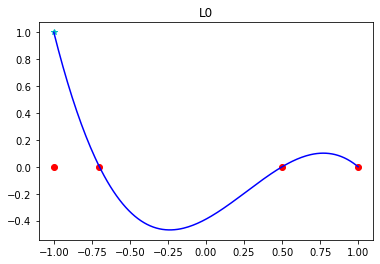

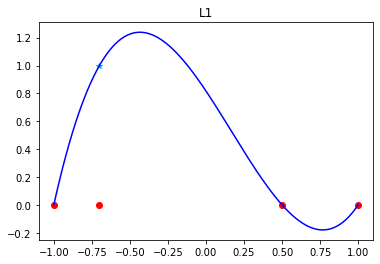

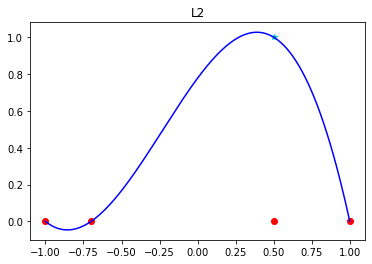

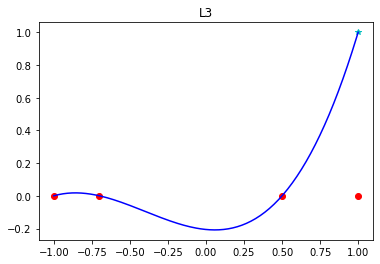

In [4]:
import matplotlib.pyplot as plt
scelta= input('Scegli Il set di nodi: 1 oppure 2')


scelta_nodi={
    '1': np.arange(0,1.1,1/4),
    '2': np.array([-1, -0.7, 0.5, 1]) 
    } 

xnodi=scelta_nodi.get(scelta) 
n=xnodi.size

xx=np.linspace(xnodi[0],xnodi[n-1],200);

for k in range(n):
    p=plagr(xnodi,k)
    L=np.polyval(p,xx)
    plt.plot(xnodi,np.zeros((n,)),'ro');
    plt.plot(xnodi[k],1,'c*');
    plt.plot(xx,L,'b-');
    plt.title('L'+str(k))
    plt.show()
    

## Esercizio 2

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.




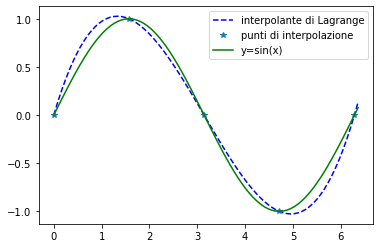

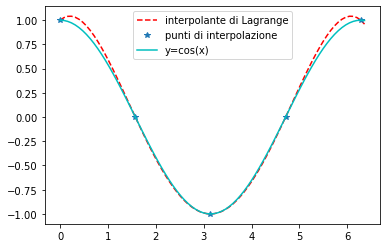

In [5]:
x=np.arange(0,2*np.pi+0.1,np.pi/2);
y1=np.sin(x)
xx=np.arange(0,2*np.pi+0.1,np.pi/40);
yy1=InterpL(x,y1,xx);


plt.plot(xx,yy1,'b--',x,y1,'*',xx,np.sin(xx),'g-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=sin(x)']);
plt.show()

y2=np.cos(x);
yy2=InterpL(x,y2,xx);
plt.plot(xx,yy2,'r--',x,y2,'*',xx,np.cos(xx),'c-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=cos(x)']);

## Esercizio 3
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

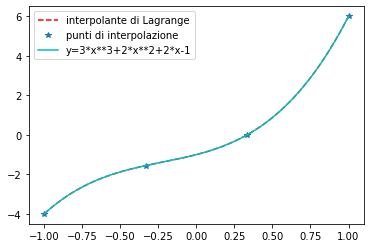

In [7]:
x=np.linspace(-1,1,4)
f= lambda x: 3*x**3+2*x**2+2*x-1
y=f(x)
xx=np.linspace(-1,1,200)
polL=InterpL(x,y ,xx)
plt.plot(xx,polL,'r--',x,y,'*',xx,f(xx),'c-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=3*x**3+2*x**2+2*x-1']);
#Poichè i nodi  (xi.yi) sono ottenuti valutando una funzione che è un polinomio di grado 3
# (che ha quindi derivata quarta nulle) nei punti xi,i=0,3, è nullo l'errore che si commette quando
#alla funzione che ha generato i dati si sostituisce il polinomio interpolatore di grado 3
#Vedi formula dell'errore dell'interpolazione polinomiale nelle dispense teoriche


## Esercizio 4
La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ 
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.



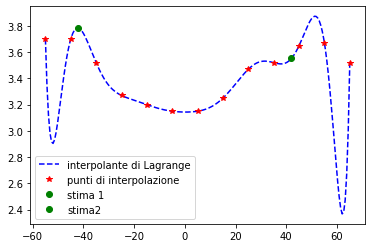

In [8]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

# punti di valutazione per l'interpolante
xx=np.linspace(np.min(L),np.max(L),200);
pol=InterpL(L,T,xx);

pol42=InterpL(L,T,np.array([42]))
pol_42=InterpL(L,T,np.array([-42]))

plt.plot(xx,pol,'b--',L,T,'r*',42,pol42,'og',-42,pol_42,'og');
plt.legend(['interpolante di Lagrange','punti di interpolazione','stima 1', 'stima2']);
plt.show()



## Esercizio 5

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).



In [9]:
def zeri_Cheb(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    diff=[]
    x=np.zeros((n+1,))
     
    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x

## Esercizio 6

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.



Scegli funzione  1
Scegli tipo punti : 1(equidistanti) 2(Chebishev)
  2
Grado del polinomio 10


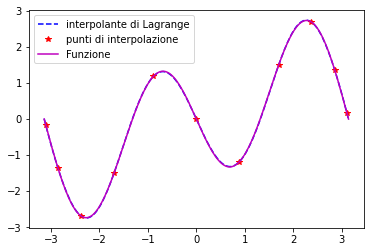

Norma infinito di r  0.014389393426698982


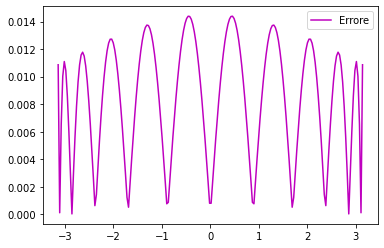

In [10]:
sceltaf=input("Scegli funzione ")
 
scelta_funzione = {
        '1': [lambda x: np.sin(x)-2*np.sin(2*x),-np.pi, np.pi],
        '2': [lambda x: np.sinh(x),-2,2],
        '3': [lambda x: np.abs(x), -1,1],
        '4': [lambda x: 1/(1+x**2), -5,5]
}

f,a,b=scelta_funzione.get(sceltaf)

sceltap= input("Scegli tipo punti : 1(equidistanti) 2(Chebishev)\n ")

n=int(input('Grado del polinomio'))

scelta_punti = {
        '1': np.linspace(a,b,n+1),
        '2': zeri_Cheb(a,b,n)
        }

x=scelta_punti.get(sceltap)

# punti di valutazione per l'interpolante
xx=np.linspace(a,b,200);


y= f(x)
pol=InterpL(x,y,xx);

plt.plot(xx,pol,'b--',x,y,'r*',xx,f(xx),'m-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','Funzione']);
plt.show()

r=np.abs(f(xx)-pol)
norm_inf_r=np.linalg.norm(r,np.inf)

print("Norma infinito di r ",norm_inf_r)
plt.plot(xx,r,'m-');
plt.legend(['Errore']);
plt.show()

## Esercizio 7

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

Costante di Lebesgue con nodi equispaziati al variare di n: 
  [[3.10493825e+00]
 [2.98943063e+01]
 [5.08711306e+02]
 [1.07596490e+04]]
Costante di Lebesgue con nodi di Chebyshev al variare di n: 
 [[2.10439768]
 [2.48943038]
 [2.72777794]
 [2.9008249 ]]


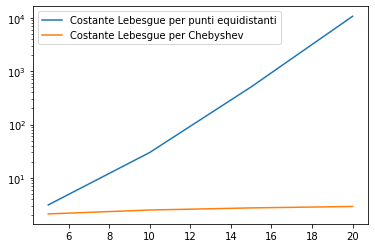

In [11]:
xx=np.linspace(-1,1,200);
LLe=np.zeros((4,1));
LLc=np.zeros((4,1));


    
i=0;
for n in range(5,25,5):

    #nodi equispaziati
    xe=np.linspace(-1,1,n+1)
    #nodi di Chebyshev 
    xc=zeri_Cheb(-1,1,n)
    
    Le=np.zeros((200,1));
    Lc=np.zeros((200,1));
    for l in range (n+1):        
        pe=plagr(xe,l);
        Le=Le+np.abs(np.polyval(pe,xx))
        pc=plagr(xc,l)
        Lc=Lc+np.abs(np.polyval(pc,xx))
    
    LLe[i]=np.max(Le)
    LLc[i]=np.max(Lc)
    i=i+1
   

print('Costante di Lebesgue con nodi equispaziati al variare di n: \n ',LLe)
plt.semilogy(range(5,25,5), LLe,range(5,25,5),LLc)
plt.legend(["Costante Lebesgue per punti equidistanti","Costante Lebesgue per Chebyshev"])

 
print('Costante di Lebesgue con nodi di Chebyshev al variare di n: \n',LLc)
 

## Esercizio 8

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.

 

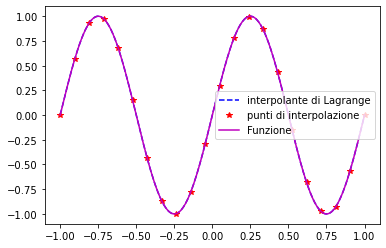

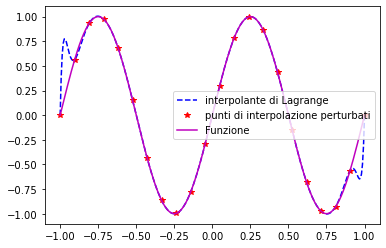

Errore relativo sui dati  0.00019977728987394052
Errore relativo sui risultati  0.6061639843452578


In [12]:
f= lambda x: np.sin(2*np.pi*x)
x=np.linspace(-1,1,22)
y1=f(x);

y2=y1.copy()
y2=y2+0.0002*np.random.random(22,)

xx=np.linspace(-1,1,300);
pol1=InterpL(x,y1,xx);
pol2=InterpL(x,y2,xx);



plt.plot(xx,pol1,'b--',x,y1,'r*',xx,f(xx),'m-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','Funzione']);
plt.show()

plt.plot(xx,pol2,'b--',x,y2,'r*',xx,f(xx),'m-');
plt.legend(['interpolante di Lagrange','punti di interpolazione perturbati','Funzione']);
plt.show()

#errore relativo sui dati
errrel_dati=np.linalg.norm(y2-y1,np.inf)/np.linalg.norm(y1,np.inf)

#errore relativo sui risultati
errrel_risultati=np.linalg.norm(pol2-pol1,np.inf)/np.linalg.norm(pol1,np.inf)

print("Errore relativo sui dati ",errrel_dati)
print("Errore relativo sui risultati ",errrel_risultati)